In [1]:
pwd

'/home/jose/Desktop/Gitlab/mitacs_project/02_First_time_passage/Simulations'

In [2]:
import Py_FTP_Langevin as ftp
from ftp_support import *

Number of processors:  20


In [3]:
fontsize_axis = 20
fontsize_legend = 16
fontsize_ticks = 14

# First time passage simulations

In [4]:
export_ovito = False

In [5]:
#//! *********** PARAMETERS PARTICLE PROPERTIES *********** !
MM,Rho_p,epsilon_lj,sigma_lj,_ = Get_params_particles("Soot")
sigma_lj=0

#//! *********** SIMULATION PARAMETERS *********** !
N_runs = 300 #; 500
Box_L_factor_dmax = 80 #80 #; //! Box size as factor of D_p
T_g = 1700. #;  1700          //! Fluid temperature
P_g = 101300. #;          //! Fluid pressure
phi_p = 0.01 / 100 #;   //! Particles number concentration (1000 ppm = 0.01)    
with_sticking = True
with_rel_motion = True
with_rotation = False
with_brownian = True
#factor_vdw , determined for each case

vdw_cutoff = 10

#//! *********** LANGEVIN PARAMETERS *********** !
run_taus_min = 120 #; // Keep in 100 to be accurate with LD theory (otherwise the 6*D*t is not strictly respected)
LD_dt_factor = 1e-01 #;

#//! *********** PARAMETERS INT. POTENTIALS *********** !
alpha_dp = 0.01 #0.01
alpha_dp_max = 0.01
direct = "aggregate_info";
#direct = "../../01_vdW_interactions/All_aggregates/FracVAL_DLCA";

In [6]:
files = ftp.get_dir_files(direct)
files.sort()
N_files = len(files)

In [7]:
#path_agg = direct + "/" + files[1000].decode('utf-8')
path_agg = direct + "/" + files[0].decode('utf-8')
print(path_agg)

aggregate_info/Agglomerate_N_000000001_Agg_00000001.dat


In [8]:
model = ftp.Pymodel(direct)
model

In [9]:
Dp_all = np.logspace(np.log10(1),np.log10(1e+03),10) * (1e-09)
#Dp_all = np.logspace(np.log10(0.01),np.log10(1e+03),10) * (1e-09)
#Dp = np.max(Dp_all)
Dp = np.min(Dp_all)

k_BT = k_B * T_g
A = np.logspace(np.log10(0.5),np.log10(250),10) * k_BT
#A = np.logspace(np.log10(0.5),np.log10(250),3) * k_BT
A = np.append(np.array([0]),A)

In [10]:
# Potential well analysis
e_well_i = np.zeros_like(A)
r_e_well_i = np.zeros_like(A)
factor_vdw_i = np.zeros_like(A)

for i in range(len(A)):
    e_well,r_e_well = Determine_pot_well(Dp,Dp,A[i],sigma_lj,k_BT)
    e_well_i[i] = e_well
    r_e_well_i[i] = r_e_well
    factor_vdw_i[i] = r_e_well/(0.5*(Dp+Dp))

In [11]:
r_e_well_i/Dp

array([1.     , 1.00001, 1.00001, 1.00001, 1.00001, 1.00001, 1.00001,
       1.00001, 1.00001, 1.00001, 1.00001])

In [12]:
ftp.Init_Random()
#ftp.Make_output_folder()

In [13]:
def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False 
    else:
        return True

In [14]:
factor_vdw = 1
properties = \
    {"new_MM": MM,
     "new_Rhop": Rho_p,
     "new_N_runs": N_runs,
     "new_box_factor": Box_L_factor_dmax,
     "new_T": T_g,
     "new_P": P_g,
     "new_phi": phi_p,
     "new_runs_taus": run_taus_min,
     "new_LD_fact": LD_dt_factor,
     "new_A": A[0],
     "new_S_LJ": sigma_lj,
     "new_alpha_dp": alpha_dp,
     "new_alpha_dp_max": alpha_dp_max,
     "new_factor_vdw": factor_vdw,
     "new_D_pp": Dp,
     "new_vdw_cutoff": vdw_cutoff,
     "with_sticking": with_sticking,
     "with_rel_motion": with_rel_motion,
     "with_rotation": with_rotation,
     "with_brownian": with_brownian,
     "new_path": direct}
    
model = Set_model_properties(model,properties)

ftp_model = ftp.PyFTP(model)

In [15]:
ftp_model.Load_aggregates_external(path_agg, model)

In [16]:
model.Show_prop()

SIMULATION
run_taus_min:                   120
L_box/D_max                     80
phi_p (ppm)                     100
Path                            aggregate_info
alpha_dp (-, factor of Dp)      0.01
alpha_dp_max (-, factor of Dp)  0.01
factor_vdw (-, factor of Dp)    1
vdw_cutoff (-, factor of Rc)    10
with_sticking (1=yes; 0=not)    1
with_rel_motion (1=yes; 0=not)  1
with_rotation (1=yes; 0=not)    0
with_brownian (1=yes; 0=not)    1
 
FLUID PROPERTIES
Temperature (K)                 1700
Pressure (Pa)                   101300
Viscosity (kg/m*s)              5.66636e-05
Mean free path (nm)             489.736
Maxwell avg. vel (m/s)          1114.75
 
PARTICLES PROPERTIES            
Particles mean diameter (nm)    1
Hamaker constant A/(k_b*T)      0
Repuls. form param. s_LJ (m)    0
Bulk mass density (kg/m^3)      1800
Monomer diameter (nm)           1
 


In [17]:
ftp_model.show_spheres()

Particle list properties      
Np (list.size()):             1(1)
Rmax (nm)                     0.5
Rs (nm)                       0.5
Rg (nm; DLCA approx.)         0.387298(0.413881)
Rg/Rp                         0.774597
Rpp_v (nm)                    0.5
mean_Rp (nm)                  0.5
lambda_p (nm)                 1863.74
m (fg)                        9.42478e-10
Kn_gas (-)                    979.473
Kn_diff (-)                   3727.47
tau (us)                      0.00278367
tau_rot (us)                  0
tau_rot/tau                   0
d_time (us)                   0.000278367
langevin_check                1
rotational f_r (kg*m^2/s)     3.03498e-35 (1)
translational f_t (kg/s)      3.38574e-16 (1)
f_rot/f_trans                 8.96401e-20
(x_cm, y_cm, z_cm)            0 0 0
orientation n_or              0.719337 -0.482598 -0.499654
v_translation                 0 0 0
v_rotation                    0 0 0
relative_distance             0
F_vdW (N)                     0
F_vdW/F_gr

In [18]:
ftp_times_j = np.zeros(len(A))
ftp_times_std_j = np.zeros(len(A))
Kn_d_j = np.zeros(len(A))
Kn_g_j = np.zeros(len(A))
tau_12_j = np.zeros(len(A))
L_j = np.zeros(len(A))
Rc_j = np.zeros(len(A))
A_j = np.zeros(len(A))
f_12_j = np.zeros(len(A))
beta_j = np.zeros(len(A))
V_box = np.zeros(len(A))
t_ij = np.zeros(len(A))
H = np.zeros(len(A))

In [19]:
j_sel = 5

In [20]:
rel_dist = []
rel_dist_nor = []
force = []
force_point = []
time_ftp = []

for j in tqdm(range(len(A))):
    print("Analysis: ",j+1,"/",len(A))
    factor_vdw = r_e_well_i[j]/Dp
    properties =\
    {"new_MM": MM,
     "new_Rhop": Rho_p,
     "new_N_runs": N_runs,
     "new_box_factor": Box_L_factor_dmax,
     "new_T": T_g,
     "new_P": P_g,
     "new_phi": phi_p,
     "new_runs_taus": run_taus_min,
     "new_LD_fact": LD_dt_factor,
     "new_A": A[j],
     "new_S_LJ": sigma_lj,
     "new_alpha_dp": alpha_dp,
     "new_alpha_dp_max": alpha_dp_max,
     "new_factor_vdw": factor_vdw,
     "new_D_pp": Dp,
     "new_vdw_cutoff": vdw_cutoff,
     "with_sticking": with_sticking,
     "with_rel_motion": with_rel_motion,
     "with_rotation": with_rotation,
     "with_brownian": with_brownian,
     "new_path": direct}
    model = Set_model_properties(model,properties)
    
    #pool = mp.Pool(mp.cpu_count())
    ftp_model.Load_aggregates_external(path_agg, model)

    ftp_model.Restart_ftp(model)
    ftp_model.Move_2_origin()
    ftp_model.Random_init_location()
    ftp_times = []
    for k in range(N_runs):
        if (k == 0 and export_ovito):
            Export_current_sim(ftp_model,0,True)
        i=1
        it_exp = 1
        collision = False
        while(not collision):
            collision = ftp_model.run(model, 100)
            if(isNaN(ftp_model.t_res)):
                print("d_time ",ftp_model.d_time, " t_res ",ftp_model.t_res)
                break
            it_exp += 1
            if(it_exp%100 == 0 and j==j_sel):
                time_ftp = np.append(time_ftp,ftp_model.t_res)
                rel_dist = np.append(rel_dist,ftp_model.Relative_dist)
                rel_dist_nor = np.append(rel_dist_nor,ftp_model.Relative_dist/ftp_model.Rc)
                f,fp = ftp_model.f_2_fp
                force = np.append(force,f)
                force_point = np.append(force_point,fp)
            if (k == 0 and export_ovito):
                Export_current_sim(ftp_model,it_exp,True)
            i += 1
        ftp_times = np.append(ftp_times, ftp_model.t_res)
    ftp_times_std_j[j] = np.std(ftp_times)
    ftp_times_j[j] = np.mean(ftp_times)
    tau_12_j[j] = ftp_model.Tau_ij
    f_12_j[j] = ftp_model.f_ij
    Kn_d_j[j] = ftp_model.Kn_d_ij
    Kn_g_j[j] = ftp_model.Kn_g_avg
    L_j[j] = ftp_model.L_box
    Rc_j[j] = ftp_model.Rc
    A_j[j] = A[j]
    V_box[j] = np.power(L_j[j],3)
    t_ij[j] = ftp_times_j[j]/tau_12_j[j]
    H[j] = V_box[j]/(np.power(Rc_j[j],3) * t_ij[j])
    m_12 = tau_12_j[j] * f_12_j[j]
    beta_j[j] = H[j] * f_12_j[j] * np.power(Rc_j[j], 3)/(m_12)
    Save_partial_results(Kn_d_j,
                         H,
                         ftp_times_j,
                         ftp_times_std_j,
                         tau_12_j,
                         Kn_g_j,
                         L_j,
                         Rc_j,
                         V_box,
                         t_ij,
                         A_j,
                         k_BT,
                         f_12_j,
                         beta_j)
notify_end()

  0%|                                       | 0/11 [00:00<?, ?it/s]

Analysis:  1 / 11


  9%|██▊                            | 1/11 [01:29<14:54, 89.43s/it]

Analysis:  2 / 11


 18%|█████▍                        | 2/11 [09:36<48:27, 323.08s/it]

Analysis:  3 / 11


 27%|████████▏                     | 3/11 [13:56<39:16, 294.61s/it]

Analysis:  4 / 11


 36%|██████████▉                   | 4/11 [19:48<37:00, 317.26s/it]

Analysis:  5 / 11


 45%|█████████████▋                | 5/11 [30:41<43:49, 438.32s/it]

Analysis:  6 / 11


 55%|████████████████▎             | 6/11 [35:56<33:01, 396.33s/it]

Analysis:  7 / 11


 64%|███████████████████           | 7/11 [51:20<37:55, 568.77s/it]

Analysis:  8 / 11


 73%|█████████████████████▊        | 8/11 [53:33<21:30, 430.13s/it]

Analysis:  9 / 11


 82%|██████████████████████▉     | 9/11 [1:18:59<25:45, 772.56s/it]

Analysis:  10 / 11


 91%|████████████████████████▌  | 10/11 [1:33:56<13:31, 811.17s/it]

Analysis:  11 / 11


100%|███████████████████████████| 11/11 [1:46:16<00:00, 579.68s/it]
/home/jose/Desktop/Gitlab/mitacs_project/02_First_time_passage/venv/lib/python3.10/site-packages/plyer/platforms/linux/notification.py:65: UserWarning: The Python dbus package is not installed.
Try installing it with your distribution's package manager, it is usually called python-dbus or python3-dbus, but you might have to try dbus-python instead, e.g. when using pip.
  warnings.warn(msg)


## Comparison with the literature

In [ ]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(ftp_times)
plt.show() 

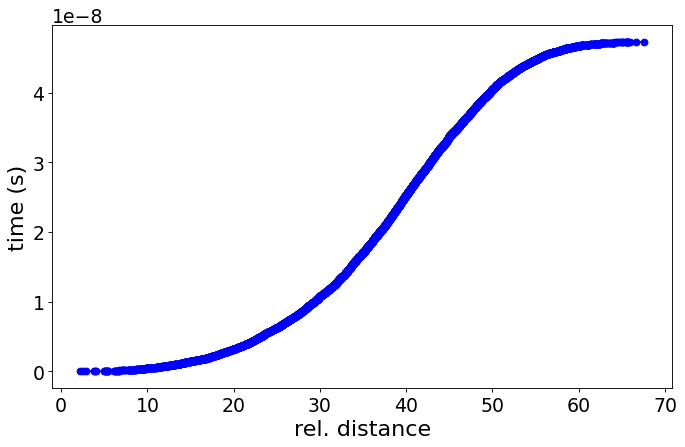

In [37]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(ftp_times,"o-b")
#plt.yscale("log")
ax1.set_xlabel('run (-)', fontsize=20)
ax1.set_ylabel('time (s)', fontsize=20)
plt.show()

In [21]:
def Attractive_point(d,Rp,A):
    temp0 = 32. * A / (3. * Rp)
    temp1 = np.power(Rp / d, 7)
    return temp0 * temp1

In [22]:
force_point2 = []
force_point3 = []

for i in range(len(rel_dist)):
    d = rel_dist[i]
    force_point2 = np.append(force_point2,ftp_model.Attr_point(d,Dp*0.5,A[j_sel]))
    force_point3 = np.append(force_point3,Attractive_point(d,Dp*0.5,A[j_sel]))

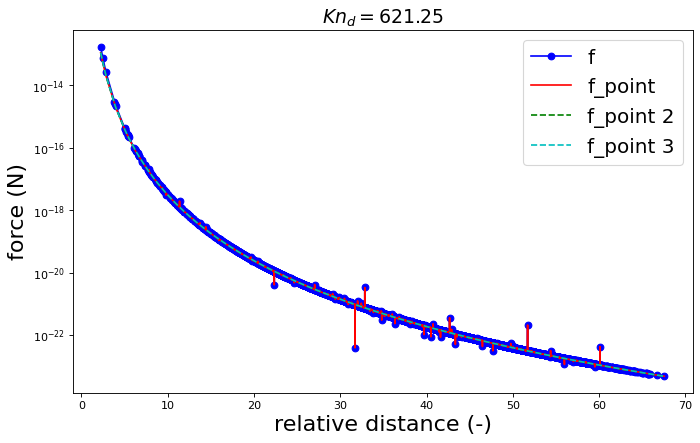

(<matplotlib.legend.Legend at 0x7fa930eb79a0>, None)

In [23]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
arr1inds = rel_dist_nor.argsort()
rel_dist_nor = rel_dist_nor[arr1inds]
force = force[arr1inds]
force_point = force_point[arr1inds]
force_point2 = force_point2[arr1inds]
force_point3 = force_point3[arr1inds]
ax1.plot(rel_dist_nor,force,"o-b",label="f")
ax1.plot(rel_dist_nor,force_point,"-r",label="f_point")
ax1.plot(rel_dist_nor,force_point2,"--g",label="f_point 2")
ax1.plot(rel_dist_nor,force_point3,"--c",label="f_point 3")

title = "$Kn_d=$"+str(round(Kn_d_j[0],2))
plt.title(title,fontsize=17)
plt.yscale("log")
ax1.set_xlabel('relative distance (-)', fontsize=20)
ax1.set_ylabel('force (N)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()

In [24]:
force_point4 = []
force_n = []

r_dist = np.logspace(np.log10(Dp*1.0001),np.log10(Dp*10))

for i in range(len(r_dist)):
    d = r_dist[i]
    force_n = np.append(force_n,ftp_model.Attr_interaction(d,Dp*0.5,Dp*0.5,A[2]))
    force_point4 = np.append(force_point4,Attractive_point(d,Dp*0.5,A[2]))

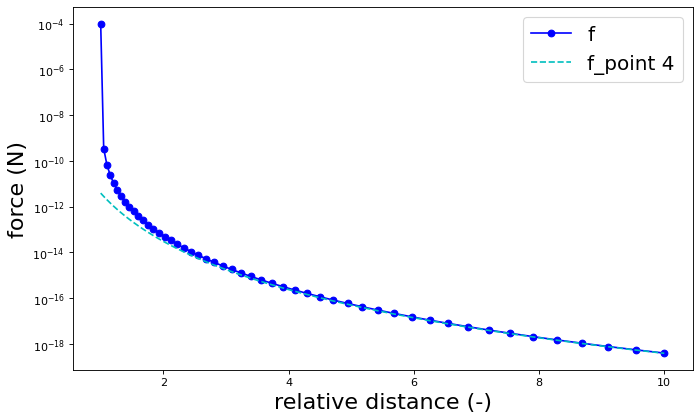

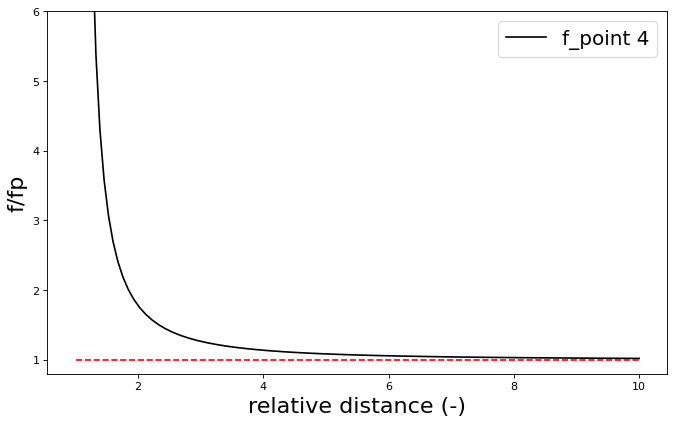

(<matplotlib.legend.Legend at 0x7fa930d7f700>, None)

In [25]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(r_dist/Dp,force_n,"o-b",label="f")
ax1.plot(r_dist/Dp,force_point4,"--c",label="f_point 4")
plt.yscale("log")
ax1.set_xlabel('relative distance (-)', fontsize=20)
ax1.set_ylabel('force (N)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()

fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(r_dist/Dp,force_n/force_point4,"-k",label="f_point 4")
ax1.plot(r_dist/Dp,force_n*0 +1,"--r")
#plt.yscale("log")
plt.ylim([0.8,6])
ax1.set_xlabel('relative distance (-)', fontsize=20)
ax1.set_ylabel('f/fp', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()

In [26]:
# Read Ouyang results
ouyang_res = pd.read_csv('old_results/Ouyang_res.dat', sep='\t')

Kn_d2 = np.logspace(np.log10(1e-02),np.log10(2e+03), 500)
H_theo = H_function(Kn_d2)
H_theo_d = H_diffusive(Kn_d2)
H_theo_b = H_ballistic(Kn_d2)
H_no_vdW = H_function(Kn_d_j[0])
H_cont_teo = 4*np.pi * np.power(Kn_d_j[0],2)

ouyang_res.head()

A/(k_b*T)    n_C   n_FM
0        0.5  1.039  1.274
1        1.5  1.075  1.434
2        2.5  1.100  1.535
3        3.5  1.119  1.612
4        4.5  1.136  1.676

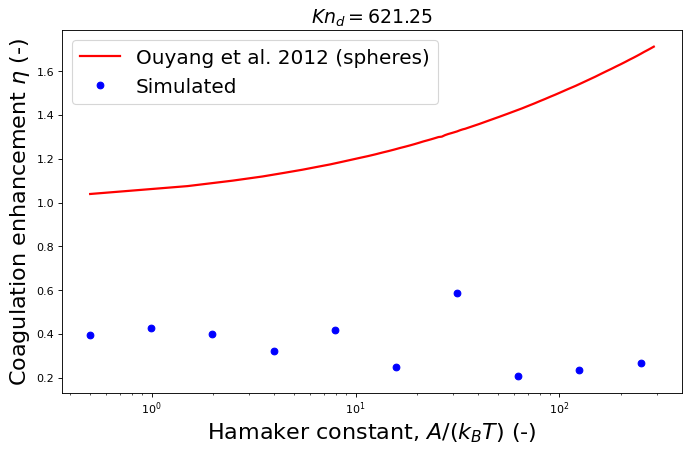

(<matplotlib.legend.Legend at 0x7fa9302c2200>, None)

In [27]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
ax1.plot(ouyang_res["A/(k_b*T)"],ouyang_res["n_C"],"-r", linewidth=2,label="Ouyang et al. 2012 (spheres)")
ax1.plot(A/k_BT,H/H[0],"o b",label="Simulated")
title = "$Kn_d=$"+str(round(Kn_d_j[0],2))
plt.title(title,fontsize=17)
plt.xscale("log")
ax1.set_xlabel('Hamaker constant, $A/(k_BT)$ (-)', fontsize=20)
ax1.set_ylabel('Coagulation enhancement $\eta$ (-)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()